In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\mahe\Desktop\Task 4\Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
data['User ID'].value_counts()

15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
           ..
15727467    1
15699619    1
15697574    1
15628972    1
15730688    1
Name: User ID, Length: 400, dtype: int64

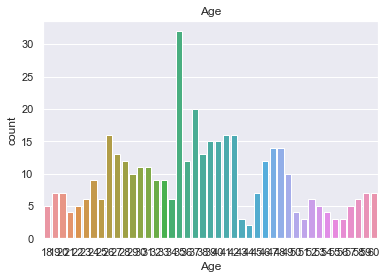

In [6]:
import seaborn as sns
sns.set(style="darkgrid")       
Age  = sns.countplot(x="Age", data =data).set_title("Age")

In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
from sklearn.preprocessing import Binarizer
#Creating a threshold 
bn = Binarizer(threshold=30)
#above 7 is considered as 1 and below 7 we are considering as 0
bn_trans = bn.transform([data['Age']])[0]
data['Age'] = bn_trans

In [9]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0,19000,0
1,15810944,Male,1,20000,0
2,15668575,Female,0,43000,0
3,15603246,Female,0,57000,0
4,15804002,Male,0,76000,0
...,...,...,...,...,...
395,15691863,Female,1,41000,1
396,15706071,Male,1,23000,1
397,15654296,Female,1,20000,1
398,15755018,Male,1,33000,0


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [12]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0,19000,0
1,15810944,1,1,20000,0
2,15668575,0,0,43000,0
3,15603246,0,0,57000,0
4,15804002,1,0,76000,0
...,...,...,...,...,...
395,15691863,0,1,41000,1
396,15706071,1,1,23000,1
397,15654296,0,1,20000,1
398,15755018,1,1,33000,0


In [14]:
def naive_bayes(x_train,y_train):
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)
    
    return classifier

In [15]:
def k_nearest_neighbors(x_train,y_train):
    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(x_train,y_train)
    
    return classifier

In [16]:
def svc(x_train,y_train):
    classifier = SVC(kernel = 'rbf', gamma = 'scale')
    classifier.fit(x_train,y_train)
    
    return classifier

In [17]:
def decision_tree(x_train,y_train):
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(x_train,y_train)
    
    return classifier

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
def build_and_train_classifier(x_train,y_train,classification_fn):
    model = classification_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    train_score = model.score(x_train,y_train)
    test_score = accuracy = accuracy_score(y_test,y_pred)
    
    print("Training Score: ",train_score)
    print("Testing Score: ", test_score)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X= data.drop('Purchased',axis =1)
X =scale(X)
Y = data['Purchased']
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [21]:
build_and_train_classifier(X_train,Y_train,naive_bayes)

Training Score:  0.70625
Testing Score:  0.725


In [22]:
build_and_train_classifier(X_train,Y_train,k_nearest_neighbors)

Training Score:  0.825
Testing Score:  0.7625


In [23]:
build_and_train_classifier(X_train,Y_train,svc)

Training Score:  0.803125
Testing Score:  0.7875


In [24]:
build_and_train_classifier(X_train,Y_train,decision_tree)

Training Score:  0.896875
Testing Score:  0.8125


In [25]:
dt_model = DecisionTreeClassifier(max_depth=6)

In [26]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dt_model.score(X_train,Y_train)

0.896875

In [29]:
y_pred_all = dt_model.predict(X)

In [32]:
accuracy_score(y_pred_all,Y)

0.88

In [33]:
data['Predicted Purchase'] = y_pred_all

In [34]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Predicted Purchase
0,15624510,1,0,19000,0,0
1,15810944,1,1,20000,0,1
2,15668575,0,0,43000,0,0
3,15603246,0,0,57000,0,0
4,15804002,1,0,76000,0,0
...,...,...,...,...,...,...
395,15691863,0,1,41000,1,1
396,15706071,1,1,23000,1,1
397,15654296,0,1,20000,1,1
398,15755018,1,1,33000,0,0


In [35]:
data.to_csv(r'C:\Users\mahe\Desktop\Task 4\Purchase_predicted.csv',index= False)